In [ ]:
!pip install numpy
!pip install matplotlib

In [3]:
import matplotlib.pyplot as plt
from scipy import special
import numpy as np

M-ary quadrature amplitude modulation (MQAM) under AWGN

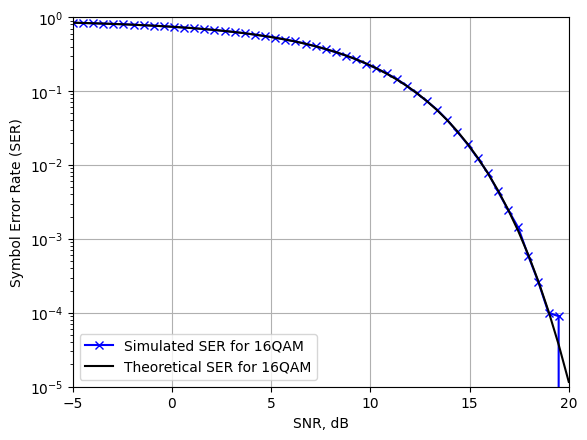

In [4]:
# Parameters
Nsym = 100000  # Number of MQAM transmitted symbols
M = 16  # Modulation order (16-QAM)
Npoints = 50  # Number of points in the Symbol Error Rate plot
EsNodBmin = -5  # Minimum value of SNR in dB
EsNodBmax = 20  # Maximum value of SNR in dB
EsNodB = np.linspace(EsNodBmin,EsNodBmax,Npoints) # Npoints linearly spaced between EsNodBmin and EsNodBmax

EsNo = pow(10,(EsNodB/10)) # Vector with Npoints refering to the SNR in linear scale

Xref_re = np.zeros(int(np.sqrt(M))) # Memory pre-allocation for real part of the reference constelation elements
Xref_imag = np.zeros(int(np.sqrt(M))) # Memory pre-allocation for imaginary part of the reference constelation elements
Xref = np.zeros((int(np.sqrt(M)),int(np.sqrt(M))),dtype = complex) # Memory pre-allocation for reference constelation

Es = 0 # Average energy per symbol initializing
for i in range(int(np.sqrt(M))):
  Xref_re[i] = np.sqrt(M)-(2*(i+1)-1) # i-th Real part of the element of the reference constelation
  for j in range(int(np.sqrt(M))):
    Xref_imag[j] = np.sqrt(M)-(2*(j+1)-1) # j-th imaginary part of the element of the reference constelation
    Xref[i,j] = Xref_re[i]+Xref_imag[j]*1j # Building the reference constelation in a matrix format
    Es = Es + pow(np.abs(Xref[i,j]),2) # Total energy of the reference constellation

Es = Es/M # Average energy per symbol

xref = np.reshape(Xref, M)
xref = xref/np.sqrt(Es) # Normalizing the energy of the reference constelation. This is necessary because we don't care about the precise value of the Es. We only need to know the ratio between it and No. This is used in order to control the plot around the variation of the ratio (SNR) only.

sigma = np.sqrt(1/(EsNo*2)) # Number 1 at the num. refers to the unitary energy of the transmitted signal because of the normalization. Each branch (real and imaginary) of the noise, will be multiplicated by this values, since, at the output of each correlator ther is a sample with variance equal to No/2.

# Arrays for transmitted and received symbols
x = np.array([], dtype=complex)
y = np.array([], dtype=complex)
v = np.zeros(M, dtype=complex)

# Distance vector and error counting
d = np.zeros(M)
yhat = np.zeros(Nsym, dtype=complex)
Pe_sim = np.zeros(Npoints)

for i in range(Npoints):
  errors = 0
  x = np.repeat(xref,Nsym/M) # The transmitted signal will be each one of the M values of the reference constellation repeated N/M times, culminating in a vector of M*(N/M) = N elements
  np.random.shuffle(x) # It makes the x vector random
  v = np.random.normal(0,sigma[i],Nsym) + np.random.normal(0,sigma[i],Nsym)*1j # It generates the Gaussian noise with mean equal to zero and standard deviation associated to the respective SNR (sigma[i])

  y = x + v

  # ML Detector
  for ii in range(Nsym): # For each one out of N received symbol
    # Euclidean distance calculation between each received sample and
    # each symbol of reference
    for iii in range(M): # For each reference symbol (which composes the reference constellation)
      d[iii] = np.abs(y[ii]-xref[iii]) # It calculates the Euclidean distance between the received symbol and each one of the reference symbol
    index_min = np.argmin(d) # Which index refers to the minimum value present in the Euclidean distance vector? This line returns that!
    yhat[ii] = xref[index_min] # The estimated symbol is the reference symbol which keeps the minimum Euclidean distance to the respective received symbol
    if yhat[ii] != x[ii]: # If the estimated symbol is different from the transmitted one
      errors = errors + 1 # The error is increased by one
  Pe_sim[i] = errors/Nsym # The SER for the respective SNR is given by the ratio between the total of errors and the total of transmitted symbols

b = np.sqrt(1/((2/3)*(M-1)));
Pe_t = 2*(1-1/np.sqrt(M))*special.erfc(b*np.sqrt(EsNo))-(1-2/np.sqrt(M)+1/M)*(pow(special.erfc(b*np.sqrt(EsNo)),2));

plt.semilogy(EsNodB, Pe_sim, 'bx-', label='Simulated SER for ' + str(M) + 'QAM under AWGN')
plt.semilogy(EsNodB, Pe_t, 'k-', label='Theoretical SER for ' + str(M) + 'QAM under AWGN')
plt.legend()
plt.xlabel('SNR, dB')
plt.ylabel('Symbol Error Rate (SER)')
plt.grid(True)
plt.axis([-5, 20, 10 ** (-5), 1])
plt.show()


M-ary quadrature amplitude modulation under Laplacian noise

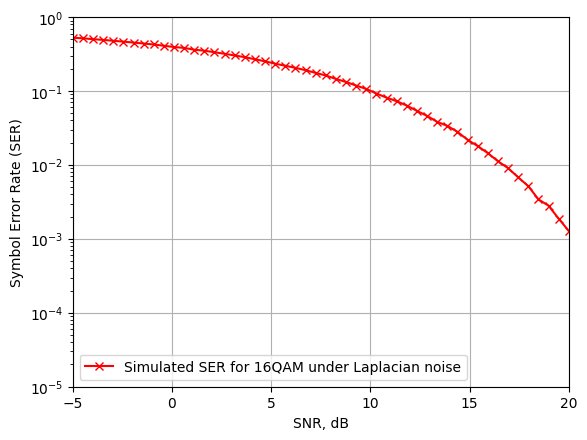

In [7]:
# Parameters
Nsym = 100000  # Number of MQAM transmitted symbols
M = 16  # Modulation order (16-QAM)
Npoints = 50  # Number of points in the Symbol Error Rate plot
EsNodBmin = -5  # Minimum value of SNR in dB
EsNodBmax = 20  # Maximum value of SNR in dB
EsNodB = np.linspace(EsNodBmin,EsNodBmax,Npoints) # Npoints linearly spaced between EsNodBmin and EsNodBmax

EsNo = pow(10,(EsNodB/10)) # Vector with Npoints refering to the SNR in linear scale

Xref_re = np.zeros(int(np.sqrt(M))) # Memory pre-allocation for real part of the reference constelation elements
Xref_imag = np.zeros(int(np.sqrt(M))) # Memory pre-allocation for imaginary part of the reference constelation elements
Xref = np.zeros((int(np.sqrt(M)),int(np.sqrt(M))),dtype = complex) # Memory pre-allocation for reference constelation

Es = 0 # Average energy per symbol initializing
for i in range(int(np.sqrt(M))):
  Xref_re[i] = np.sqrt(M)-(2*(i+1)-1) # i-th Real part of the element of the reference constelation
  for j in range(int(np.sqrt(M))):
    Xref_imag[j] = np.sqrt(M)-(2*(j+1)-1) # j-th imaginary part of the element of the reference constelation
    Xref[i,j] = Xref_re[i]+Xref_imag[j]*1j # Building the reference constelation in a matrix format
    Es = Es + pow(np.abs(Xref[i,j]),2) # Total energy of the reference constellation

Es = Es/M # Average energy per symbol

xref = np.reshape(Xref, M)
xref = xref/np.sqrt(Es) # Normalizing the energy of the reference constelation. This is necessary because we don't care about the precise value of the Es. We only need to know the ratio between it and No. This is used in order to control the plot around the variation of the ratio (SNR) only.

sigma = np.sqrt(1/(EsNo*2)) # Number 1 at the num. refers to the unitary energy of the transmitted signal because of the normalization. Each branch (real and imaginary) of the noise, will be multiplicated by this values, since, at the output of each correlator ther is a sample with variance equal to No/2.

# Arrays for transmitted and received symbols
x = np.array([], dtype=complex)
y = np.array([], dtype=complex)
v = np.zeros(M, dtype=complex)
l = np.zeros(M, dtype=complex)
# b = np.sqrt(pow(sigma,2) / 2)

# Distance vector and error counting
d = np.zeros(M)
yhat = np.zeros(Nsym, dtype=complex)
Pe_sim = np.zeros(Npoints)

for i in range(Npoints):
  errors = 0
  x = np.repeat(xref,Nsym/M) # The transmitted signal will be each one of the M values of the reference constellation repeated N/M times, culminating in a vector of M*(N/M) = N elements
  np.random.shuffle(x) # It makes the x vector random
  v = np.random.normal(0,sigma[i],Nsym) + np.random.normal(0,sigma[i],Nsym)*1j # It generates the Gaussian noise with mean equal to zero and standard deviation associated to the respective SNR (sigma[i])
  l = np.random.exponential(scale=np.sqrt(pow(sigma[i],2) / 2), size=Nsym) - np.random.exponential(scale=np.sqrt(pow(sigma[i],2) / 2), size=Nsym)

  #y = x + v
  y = x + l

  # ML Detector
  for ii in range(Nsym): # For each one out of N received symbol
    # Euclidean distance calculation between each received sample and
    # each symbol of reference
    for iii in range(M): # For each reference symbol (which composes the reference constellation)
      d[iii] = np.abs(y[ii]-xref[iii]) # It calculates the Euclidean distance between the received symbol and each one of the reference symbol
    index_min = np.argmin(d) # Which index refers to the minimum value present in the Euclidean distance vector? This line returns that!
    yhat[ii] = xref[index_min] # The estimated symbol is the reference symbol which keeps the minimum Euclidean distance to the respective received symbol
    if yhat[ii] != x[ii]: # If the estimated symbol is different from the transmitted one
      errors = errors + 1 # The error is increased by one
  Pe_sim[i] = errors/Nsym # The SER for the respective SNR is given by the ratio between the total of errors and the total of transmitted symbols

# b = np.sqrt(1/((2/3)*(M-1)));
# Pe_t = 2*(1-1/np.sqrt(M))*special.erfc(b*np.sqrt(EsNo))-(1-2/np.sqrt(M)+1/M)*(pow(special.erfc(b*np.sqrt(EsNo)),2));

plt.semilogy(EsNodB, Pe_sim, 'rx-', label='Simulated SER for ' + str(M) + 'QAM under Laplacian noise')
# plt.semilogy(EsNodB, Pe_t, 'k-', label='Theoretical SER for ' + str(M) + 'QAM')
plt.legend()
plt.xlabel('SNR, dB')
plt.ylabel('Symbol Error Rate (SER)')
plt.grid(True)
plt.axis([-5, 20, 10 ** (-5), 1])
plt.show()
